<a href="https://colab.research.google.com/github/GShivasai00/chess/blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor





In [ ]:
df1 = pd.read_csv('calories.csv')
df1.head()


,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
df2 = pd.read_csv('exercise.csv')
df2.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [ ]:
df3 = pd.concat([df2,df1['Calories']], axis=1)
df3.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
df3.shape


(15000, 9)

In [ ]:
df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
df3.describe()


,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


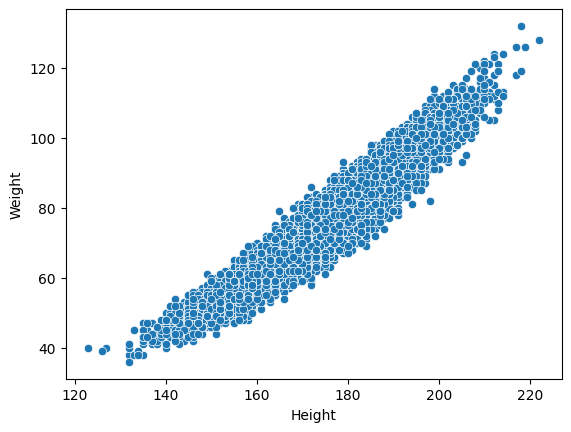

In [ ]:
sb.scatterplot(x='Height', y='Weight', data=df3)
plt.show()

# This code is modified by Susobhan Akhuli


<ipython-input-21-1562c25b61ab>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i + 1)


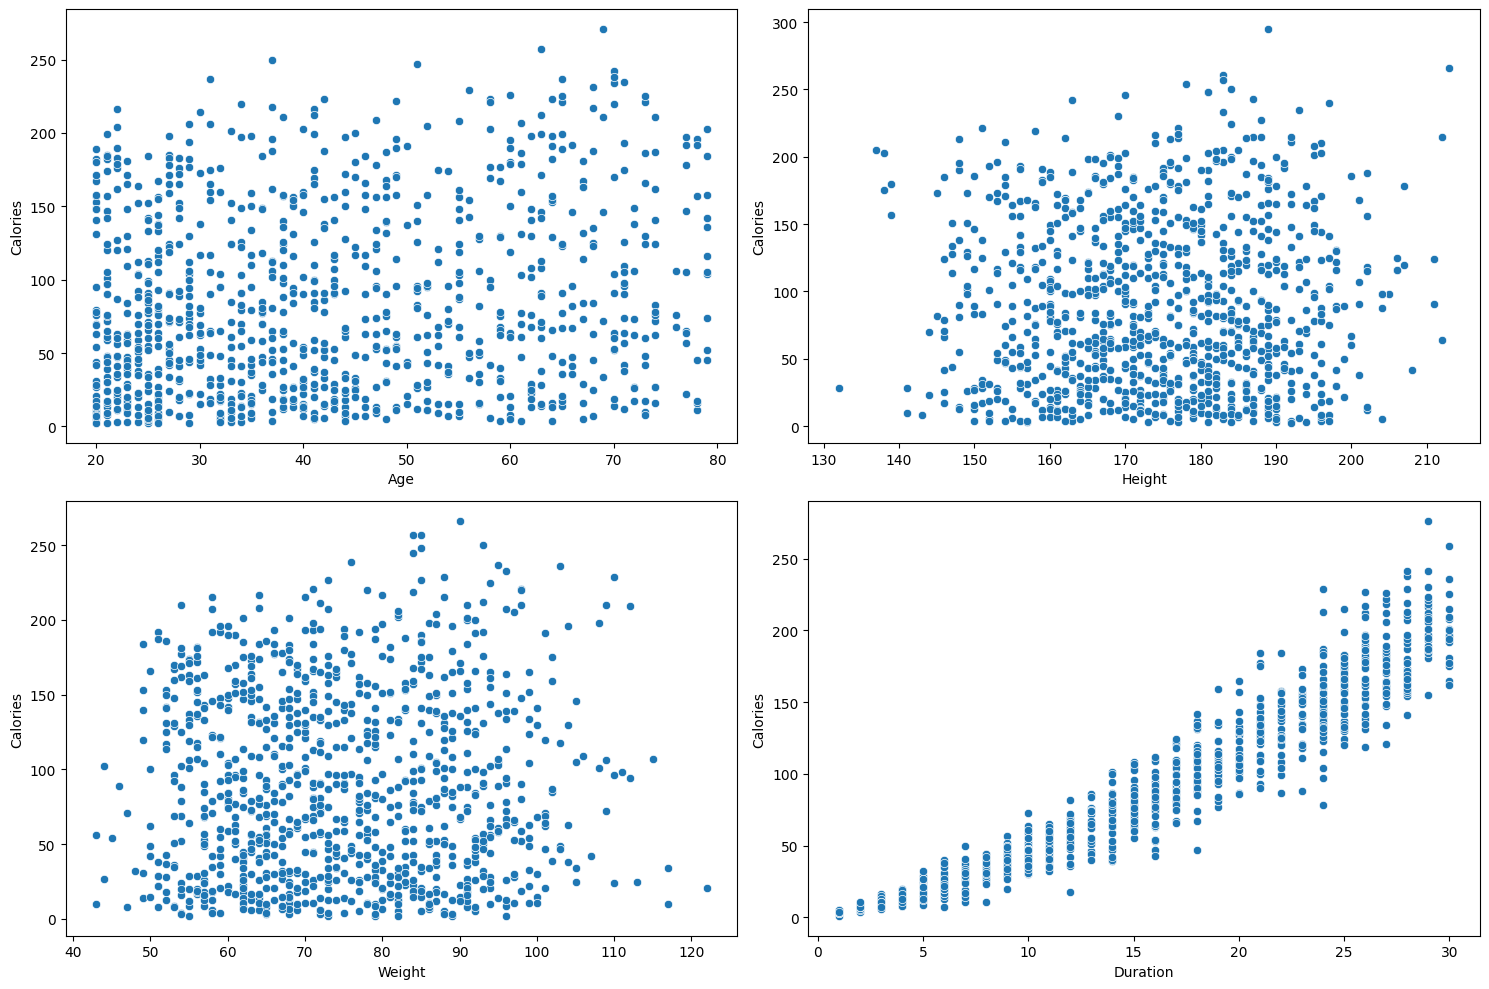

In [ ]:
features = ['Age', 'Height', 'Weight', 'Duration']

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    # Instead of sampling, use the original DataFrame 'df' with a condition to limit the data points.
    # This will ensure that 'Calories' column is present.
    x = df3.sample(1000)  # Keep this line if you want a random sample
    sb.scatterplot(x=col, y='Calories', data=df3[df3.index.isin(x.index)])
plt.tight_layout()
plt.show()

# This code is modified by Susobhan Akhuli

# This code is modified by Susobhan Akhuli


<ipython-input-22-01885ca24699>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i + 1)
<ipython-input-22-01885ca24699>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i + 1)
<ipython-input-22-01885ca24699>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i + 1)
<ipython-input-22-01885ca24699>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i + 1)
<ipython-input-22-01885ca24699>:5: MatplotlibDeprecationWarning:

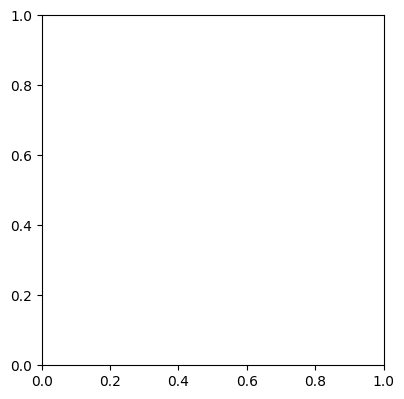

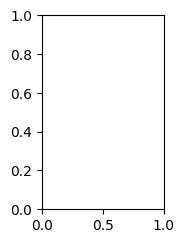

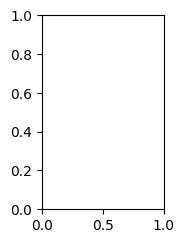

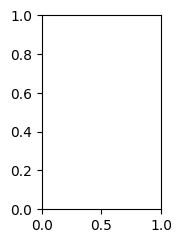

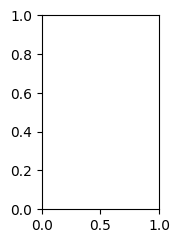

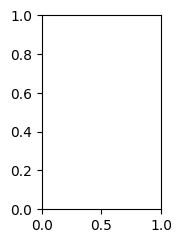

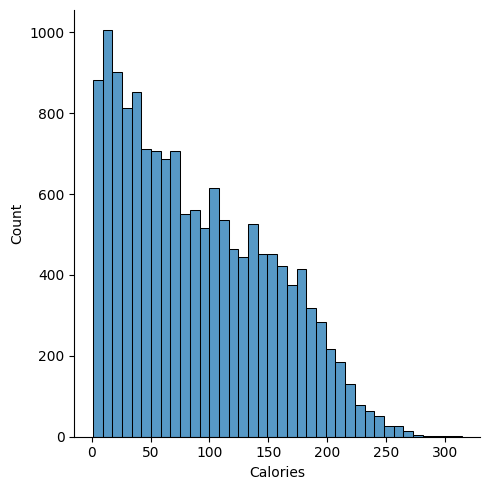

In [ ]:
features = df3.select_dtypes(include='float').columns

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sb.displot(df3[col])
plt.tight_layout()
plt.show()


In [ ]:
df3.replace({'male': 0, 'female': 1},
           inplace=True)
df3.head()


<ipython-input-23-087f209bace8>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3.replace({'male': 0, 'female': 1},


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


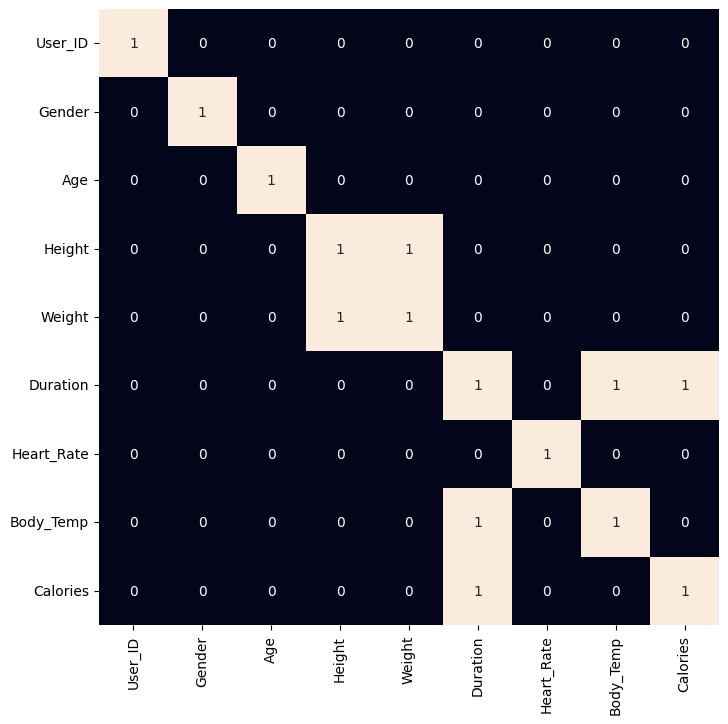

In [ ]:
plt.figure(figsize=(8, 8))
sb.heatmap(df3.corr() > 0.9,
           annot=True,
           cbar=False)
plt.show()


In [ ]:
features = df3.drop(['User_ID', 'Calories'], axis=1)
target = df3['Calories'].values

X_train, X_val,\
    Y_train, Y_val = train_test_split(features, target,
                                      test_size=0.1,
                                      random_state=22)
X_train.shape, X_val.shape



((13500, 7), (1500, 7))

In [ ]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [ ]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [ ]:
from sklearn.metrics import mean_absolute_error as mae
models = [LinearRegression(), XGBRegressor(),
          Lasso(), RandomForestRegressor(), Ridge()]

for i in range(5):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')

    train_preds = models[i].predict(X_train)
    print('Training Error : ', mae(Y_train, train_preds))

    val_preds = models[i].predict(X_val)
    print('Validation Error : ', mae(Y_val, val_preds))
    print()



LinearRegression() : 
Training Error :  8.332985229896742
Validation Error :  8.386502237633923

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) : 
Training Error :  0.9322033420062313
Validation Error :  0.9965093748569489

Lasso() : 
Training Error :  9.049658999072935
Validation Error :  9.0675165

In [ ]:
model = XGBRegressor()
#training the model with X_train
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Assuming you want to predict using the last trained model (XGBRegressor), you can do:
calories_burnt_prediction = models[-1].predict(X_test)
# models[-1] accesses the last element of the models list which should be your XGBRegressor
print(calories_burnt_prediction)

# Or, if you want to predict using each model in the list, you would need to loop through it:
for model in models:
    calories_burnt_prediction = model.predict(X_test)
    print(f"Prediction from {type(model).__name__}: {calories_burnt_prediction}")

[2966.30326363 3551.9865761  2078.82128706 ... 3126.14842941 1797.4986908
 2659.55311922]
Prediction from LinearRegression: [2964.51730348 3550.1491888  2076.38449469 ... 3124.27537667 1795.14265312
 2657.4804489 ]
Prediction from XGBRegressor: [252.42699 311.31204 252.42699 ... 252.42699 252.42699 252.42699]
Prediction from Lasso: [3227.2892095  3740.51106449 2512.63401582 ... 3394.7049263  2246.5343064
 2998.16023468]
Prediction from RandomForestRegressor: [225.54 225.54 225.54 ... 225.54 225.54 225.54]
Prediction from Ridge: [2966.30326363 3551.9865761  2078.82128706 ... 3126.14842941 1797.4986908
 2659.55311922]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


In [ ]:
MAE = metrics.mean_absolute_error(Y_test, calories_burnt_prediction)
print("Mean Absolute Error = ",MAE)


Mean Absolute Error =  2385.002441046474


In [ ]:
from sklearn.metrics import mean_absolute_error

val_preds = model.predict(X_val)
# Use mean_absolute_error directly after importing it
mae_xgb = mean_absolute_error(Y_val, val_preds)
print("MAE for XGBoost:", mae_xgb)

MAE for XGBoost: 8.386583219636554


In [ ]:
input_data = (0,68,190.0,94.0,29.0,105.0,40.8,231)
#input_data_as_numpy_array = np.asarray(input_data)
#input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
#prediction = model.predict(input_data_reshaped)
#print(prediction)
#print("The initial value is ",prediction[0])
print("The calories burnt for the first individual in the dataset is predicted as ", calories_burnt_prediction[0])

The calories burnt for the first individual in the dataset is predicted as  2966.3032636331673


In [ ]:
print("Thus we have successfully predicted the calories burnt using XGBoost")

Thus we have successfully predicted the calories burnt using XGBoost
